In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-11 18:09:09.461886: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/jg/lkqyq8zj1cxg49bgvkxt3l2w0000gn/T/ipykernel_71707/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Create random data between (-10, 10) and determine groundtruth
simulated_Input = 20 * torch.rand((1000, 1)) - 10
ground_truth_cos = np.cos(simulated_Input)
ground_truth_sin = np.arcsinh(simulated_Input)

In [3]:
# Neural Network Definitions
# Shallow NN for simulation - 1 Hidden layer / 751 Parameters
class shallow_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 250)
        self.fc2 = nn.Linear(250, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

# Middle NN for simulation - 3 Hidden layer / 755 Parameters
class middle_sim_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 9)
        self.fc4 = nn.Linear(9, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val    
# Deep NN for simulation -  5 Hidden Layers / 747 Parameters
class deep_sim_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 24)
        self.fc2 = nn.Linear(24, 16)
        self.fc3 = nn.Linear(16, 10)
        self.fc4 = nn.Linear(10, 8)        
        self.fc5 = nn.Linear(8, 4)
        self.fc6 = nn.Linear(4, 1)        
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val

In [4]:
# Set up necessary auxilaries for neural net training for simulation of both functions
shallow_cos_nn = shallow_nn()
middle_cos_nn = middle_sim_nn()
deep_cos_nn = deep_sim_nn()
shallow_sin_nn = shallow_nn()
middle_sin_nn = middle_sim_nn()
deep_sin_nn = deep_sim_nn()
costFunc = nn.MSELoss()
shallowCosOpt = optim.Adam(shallow_cos_nn.parameters(), lr=0.001)
middleCosOpt = optim.Adam(middle_cos_nn.parameters(), lr=0.001)
deepCosOpt = optim.Adam(deep_cos_nn.parameters(), lr=0.001)
shallowSinOpt = optim.Adam(shallow_sin_nn.parameters(), lr=0.001)
middleSinOpt = optim.Adam(middle_sin_nn.parameters(), lr=0.001)
deepSinOpt = optim.Adam(deep_sin_nn.parameters(), lr=0.001)

In [5]:
# Train neural networks and track progression on function cos(x)
EPOCHS = 1000
counter = 0
counterList = []
shallow_cos_cost_list = []
for index in range(EPOCHS):
    counterList.append(counter)
    counter += 1
    shallow_cos_nn.zero_grad()
    output = shallow_cos_nn(simulated_Input)
    cost = costFunc(output, ground_truth_cos)
    with torch.no_grad():
        c1 = costFunc(output, ground_truth_cos)
    shallow_cos_cost_list.append(c1)
    cost.backward()
    shallowCosOpt.step()

middleCosCostList = []
for index in range(EPOCHS):
    middle_cos_nn.zero_grad()
    output = middle_cos_nn(simulated_Input)
    cost = costFunc(output, ground_truth_cos)
    with torch.no_grad():
        c1 = costFunc(output, ground_truth_cos)
    middleCosCostList.append(c1)
    cost.backward()
    middleCosOpt.step()    
    
deepCosCostList = []
for index in range(EPOCHS):
    deep_cos_nn.zero_grad()
    output = deep_cos_nn(simulated_Input)
    cost = costFunc(output, ground_truth_cos)
    with torch.no_grad():
        c1 = costFunc(output, ground_truth_cos)
    deepCosCostList.append(c1)
    cost.backward()
    deepCosOpt.step()

In [6]:
# Train neural networks and track progression on function arcsinh(x)
shallowSinCostList = []
for index in range(EPOCHS):
    shallow_sin_nn.zero_grad()
    output = shallow_sin_nn(simulated_Input)
    cost = costFunc(output, ground_truth_sin)
    with torch.no_grad():
        c1 = costFunc(output, ground_truth_sin)
    shallowSinCostList.append(c1)
    cost.backward()
    shallowSinOpt.step()

middleSinCostList = []
for index in range(EPOCHS):
    middle_sin_nn.zero_grad()
    output = middle_sin_nn(simulated_Input)
    cost = costFunc(output, ground_truth_sin)
    with torch.no_grad():
        c1 = costFunc(output, ground_truth_sin)
    middleSinCostList.append(c1)
    cost.backward()
    middleSinOpt.step()    
    
deepSinCostList = []
for index in range(EPOCHS):
    deep_sin_nn.zero_grad()
    output = deep_sin_nn(simulated_Input)
    cost = costFunc(output, ground_truth_sin)
    with torch.no_grad():
        c1 = costFunc(output, ground_truth_sin)
    deepSinCostList.append(c1)
    cost.backward()
    deepSinOpt.step()

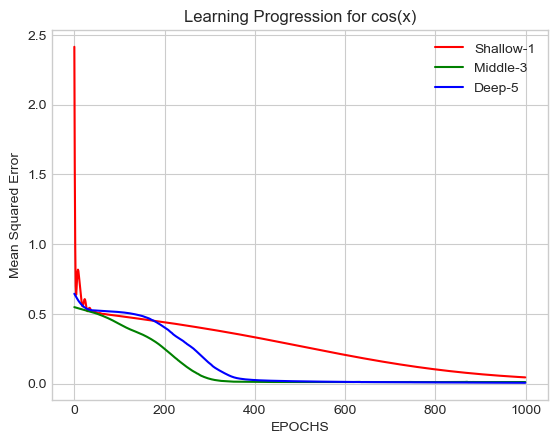

In [7]:
# Visulaize Training process of cos function
plt.plot(counterList, shallow_cos_cost_list, 'r', label='Shallow-1')
plt.plot(counterList, middleCosCostList, 'g', label='Middle-3')
plt.plot(counterList, deepCosCostList, 'b', label='Deep-5')
plt.title("Learning Progression for cos(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

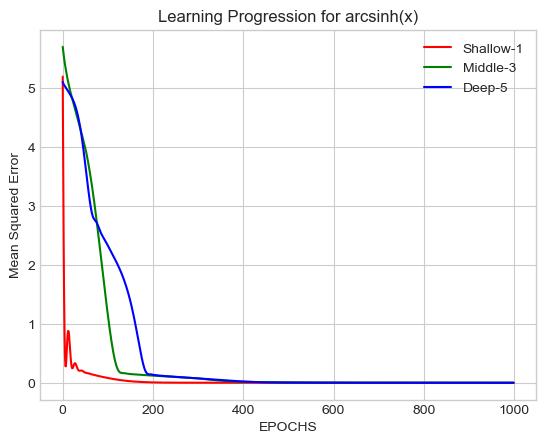

In [8]:
# Visulaize Training process of arcsinh(x) function
plt.plot(counterList, shallowSinCostList, 'r', label='Shallow-1')
plt.plot(counterList, middleSinCostList, 'g', label='Middle-3')
plt.plot(counterList, deepSinCostList, 'b', label='Deep-5')
plt.title("Learning Progression for arcsinh(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

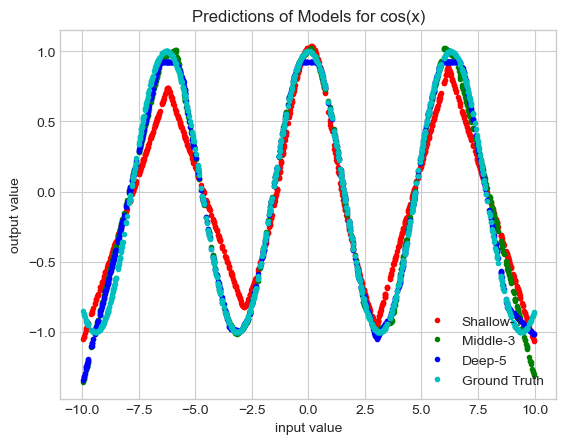

In [9]:
# Visulaize how well the neural nets do with unseen data
simulated_Input = 20 * torch.rand((1000, 1)) - 10
ground_truth_cos = np.cos(simulated_Input)
ground_truth_sin = np.arcsinh(simulated_Input)

# run output through nns and get predictions
shallow_cos_op = shallow_cos_nn(simulated_Input)
middle_cos_op = middle_cos_nn(simulated_Input)
deep_cos_op = deep_cos_nn(simulated_Input)
shallow_sin_op = shallow_sin_nn(simulated_Input)
middle_sin_op = middle_sin_nn(simulated_Input)
deep_sin_op = deep_sin_nn(simulated_Input)

# plot predictions for cos(x) and compate to ground truth
plt.plot(simulated_Input, shallow_cos_op.tolist(), 'r.', label='Shallow-1')
plt.plot(simulated_Input, middle_cos_op.tolist(), 'g.', label='Middle-3')
plt.plot(simulated_Input, deep_cos_op.tolist(), 'b.', label='Deep-5')
plt.plot(simulated_Input, ground_truth_cos.tolist(), 'c.', label='Ground Truth')
plt.title("Predictions of Models for cos(x)")
plt.xlabel("input value")
plt.ylabel("output value")
plt.legend(loc="lower right")
plt.show()

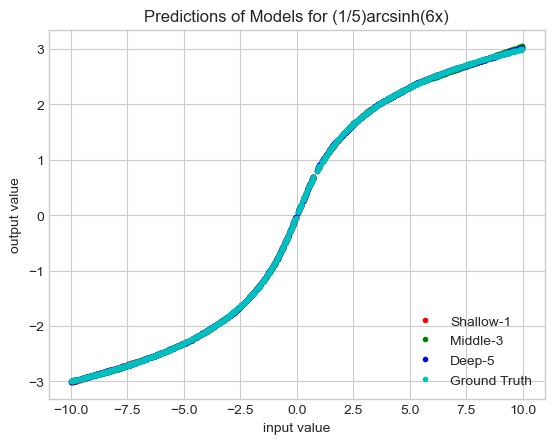

In [10]:
# plot predictions for arcsinh(x) and compate to ground truth
plt.plot(simulated_Input, shallow_sin_op.tolist(), 'r.', label='Shallow-1')
plt.plot(simulated_Input, middle_sin_op.tolist(), 'g.', label='Middle-3')
plt.plot(simulated_Input, deep_sin_op.tolist(), 'b.', label='Deep-5')
plt.plot(simulated_Input, ground_truth_sin.tolist(), 'c.', label='Ground Truth')
plt.title("Predictions of Models for (1/5)arcsinh(6x)")
plt.xlabel("input value")
plt.ylabel("output value")
plt.legend(loc="lower right")
plt.show()